In [7]:
sessionInfo()
options(repr.plot.width=14,repr.plot.antialias='subpixel',repr.plot.res=218)
update.packages()

R version 4.0.5 (2021-03-31)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Mojave 10.14.6

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_0.4.2       digest_0.6.27     utf8_1.2.1        crayon_1.4.1     
 [5] IRdisplay_1.0     repr_1.1.3        lifecycle_1.0.0   jsonlite_1.7.2   
 [9] evaluate_0.14     pillar_1.6.0      rlang_0.4.10      uuid_0.1-4       
[13] vctrs_0.3.7       ellipsis_0.3.1    IRkernel_1.1.1    tools_4.0.5      
[17] compiler_4.0.5    base64enc_0.1-3   pbdZMQ_0.3-5      htmltools_0.5.1.1

Update? (Yes/no/cancel) Yes
Update? (Yes/no/cancel) Yes
Update? (Yes/no/cancel) Yes
Update? (Yes/no/cancel) Yes
Update? (Yes/no/cancel) 
Update? (Yes/no/cancel) 
cli :
 Version 2.4.0 installed in /Library/Frameworks/R.framework/Versions/4.0/Resources/library 
 Version 2.5.0 available at https://cran.r-project.org
cluster :
 Version 2.1.1 installed in /Library/Frameworks/R.framework/Versions/4.0/Resources/library 
 Version 2.1.2 available at https://cran.r-project.org
ellipsis :
 Version 0.3.1 installed in /Library/Frameworks/R.framework/Versions/4.0/Resources/library 
 Version 0.3.2 available at https://cran.r-project.org
mgcv :
 Version 1.8-34 installed in /Library/Frameworks/R.framework/Versions/4.0/Resources/library 
 Version 1.8-35 available at https://cran.r-project.org
survival :
 Version 3.2-10 installed in /Library/Frameworks/R.framework/Versions/4.0/Resources/library 
 Version 3.2-11 available at https://cran.r-project.org
vctrs :
 Version 0.3.7 installed in /Library/Framework

installing the source packages ‘ellipsis’, ‘vctrs’




In [11]:
data <- read.csv("https://raw.githubusercontent.com/TaddyLab/BDS/master/examples/oj.csv")
write.csv(data,"oj.csv", row.names = FALSE)
data$brand <- factor(data$brand)
head(data)

[1] "dominicks"   "minute.maid" "tropicana"

,sales,price,brand,feat
,<dbl>,<dbl>,<fct>,<int>
1,8256,3.87,tropicana,0
2,6144,3.87,tropicana,0
3,3840,3.87,tropicana,0
4,8000,3.87,tropicana,0
5,8896,3.87,tropicana,0
6,7168,3.87,tropicana,0


In [12]:
levels(data$brand)

[1] "dominicks"   "minute.maid" "tropicana"

In [6]:
summary(data)

     sales            price          brand                feat       
 Min.   :    64   Min.   :0.520   Length:28947       Min.   :0.0000  
 1st Qu.:  4864   1st Qu.:1.790   Class :character   1st Qu.:0.0000  
 Median :  8384   Median :2.170   Mode  :character   Median :0.0000  
 Mean   : 17312   Mean   :2.282                      Mean   :0.2373  
 3rd Qu.: 17408   3rd Qu.:2.730                      3rd Qu.:0.0000  
 Max.   :716416   Max.   :3.870                      Max.   :1.0000  

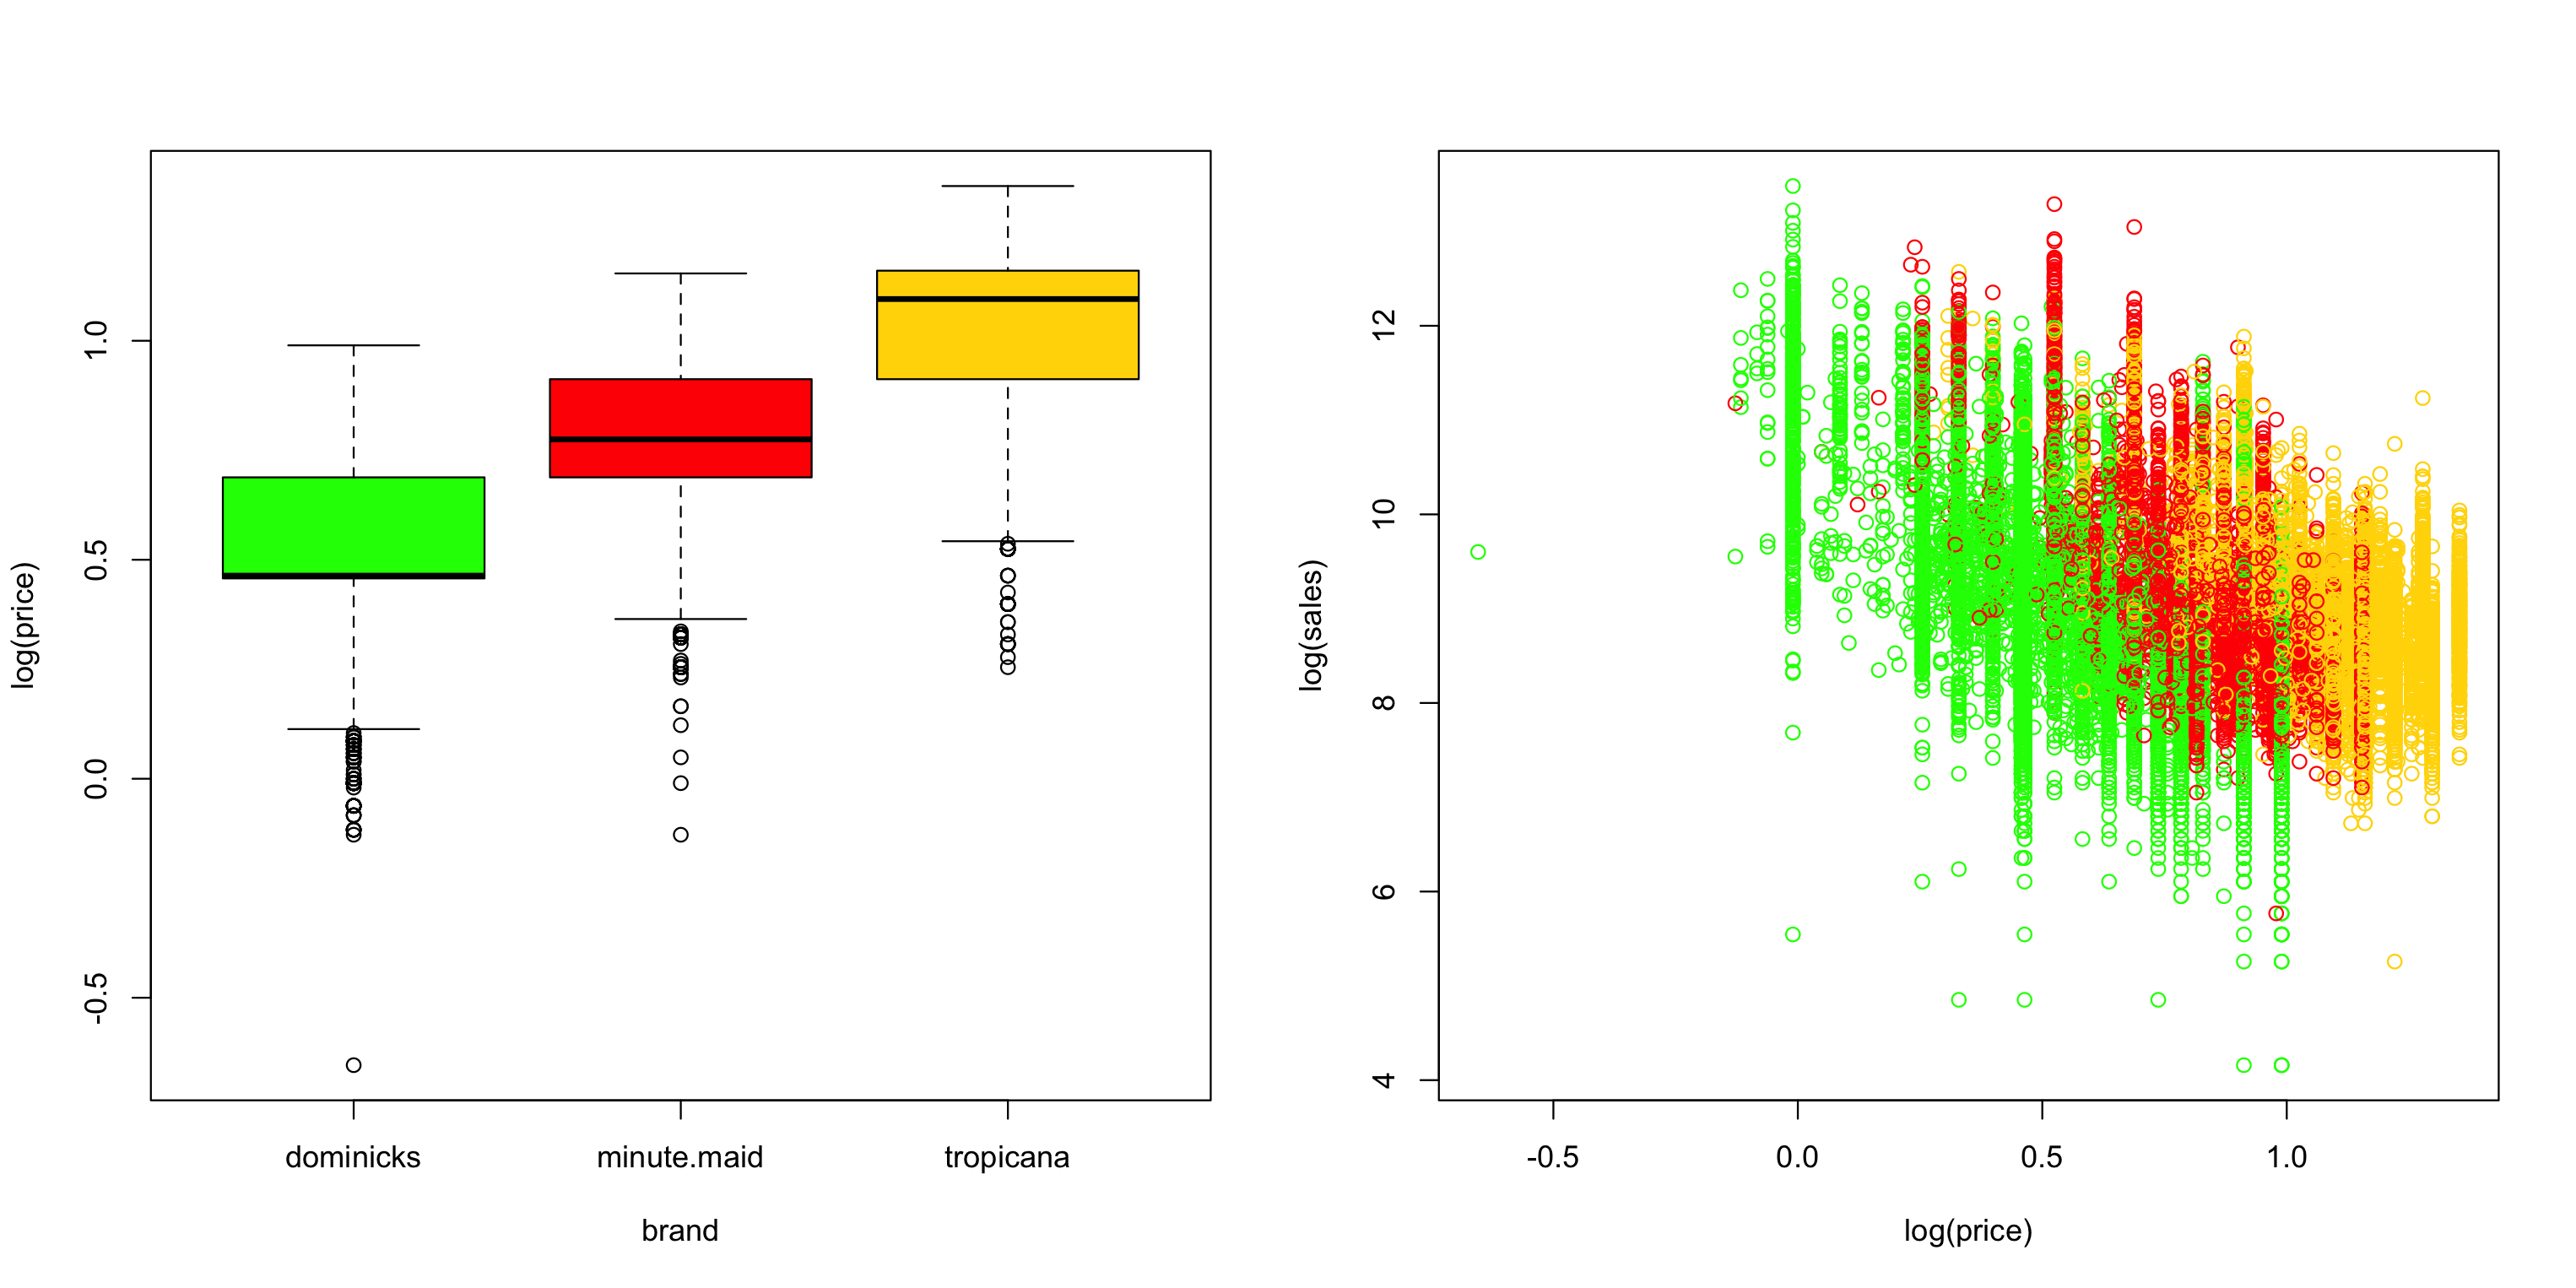

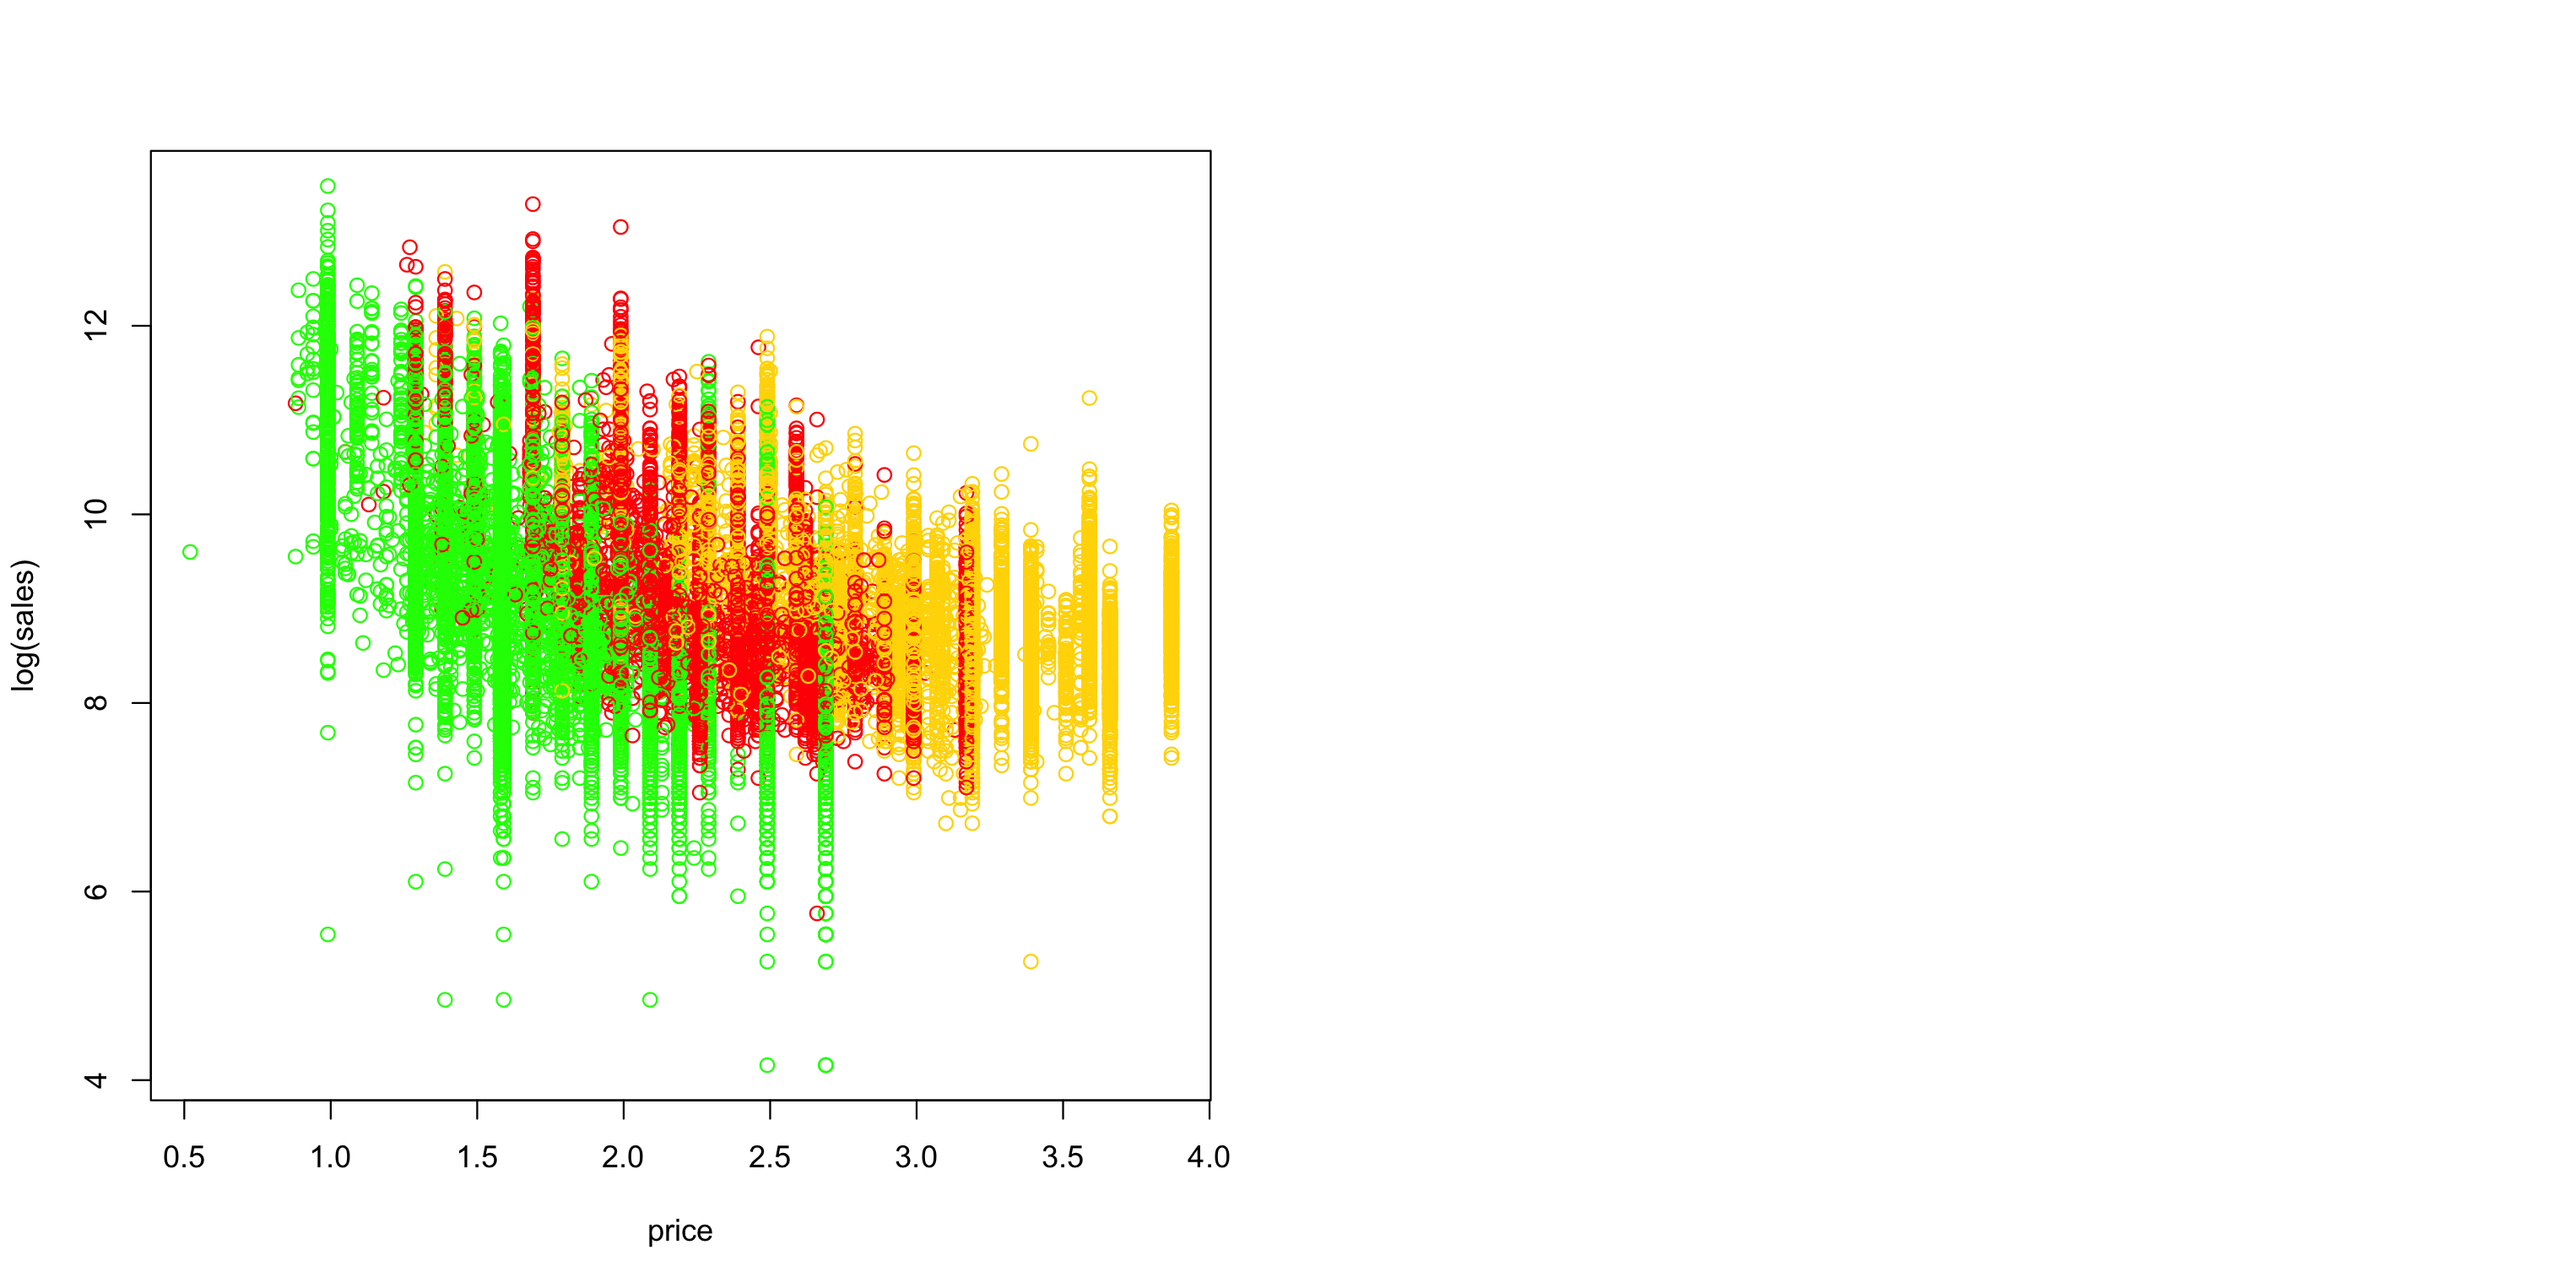

In [18]:
brandcol <- c("green","red","gold")
par(mfrow=c(1,2))
plot(log(price) ~ brand, data=data, col=brandcol)
plot(log(sales) ~ log(price), data=data, col=brandcol[data$brand])
plot(log(sales) ~ price, data=data, col=brandcol[data$brand])
#cool how you can do multiple plots in a cell

In [31]:
reg = glm(log(sales) ~ log(price) + brand, data=data)

In [20]:
summary(reg)


Call:
glm(formula = log(sales) ~ log(price) + brand, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.3152  -0.5246  -0.0502   0.4929   3.5088  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      10.82882    0.01453  745.04   <2e-16 ***
log(price)       -3.13869    0.02293 -136.89   <2e-16 ***
brandminute.maid  0.87017    0.01293   67.32   <2e-16 ***
brandtropicana    1.52994    0.01631   93.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.6296804)

    Null deviance: 30079  on 28946  degrees of freedom
Residual deviance: 18225  on 28943  degrees of freedom
AIC: 68765

Number of Fisher Scoring iterations: 2


In [25]:
round(coef(reg),2)

(Intercept)       log(price) brandminute.maid   brandtropicana 
           10.83            -3.14             0.87             1.53

In [44]:
data[100,]

,sales,price,brand,feat
,<dbl>,<dbl>,<fct>,<int>
100,4416,3.19,tropicana,0


In [45]:
predict(reg, newdata=data[100,])

100 
8.717817

In [54]:
cat(beta[1])

10.8288211.699

In [56]:
cat(beta[1]+beta[3])

11.699

In [55]:
cat(beta[1]+beta[4])

12.35876

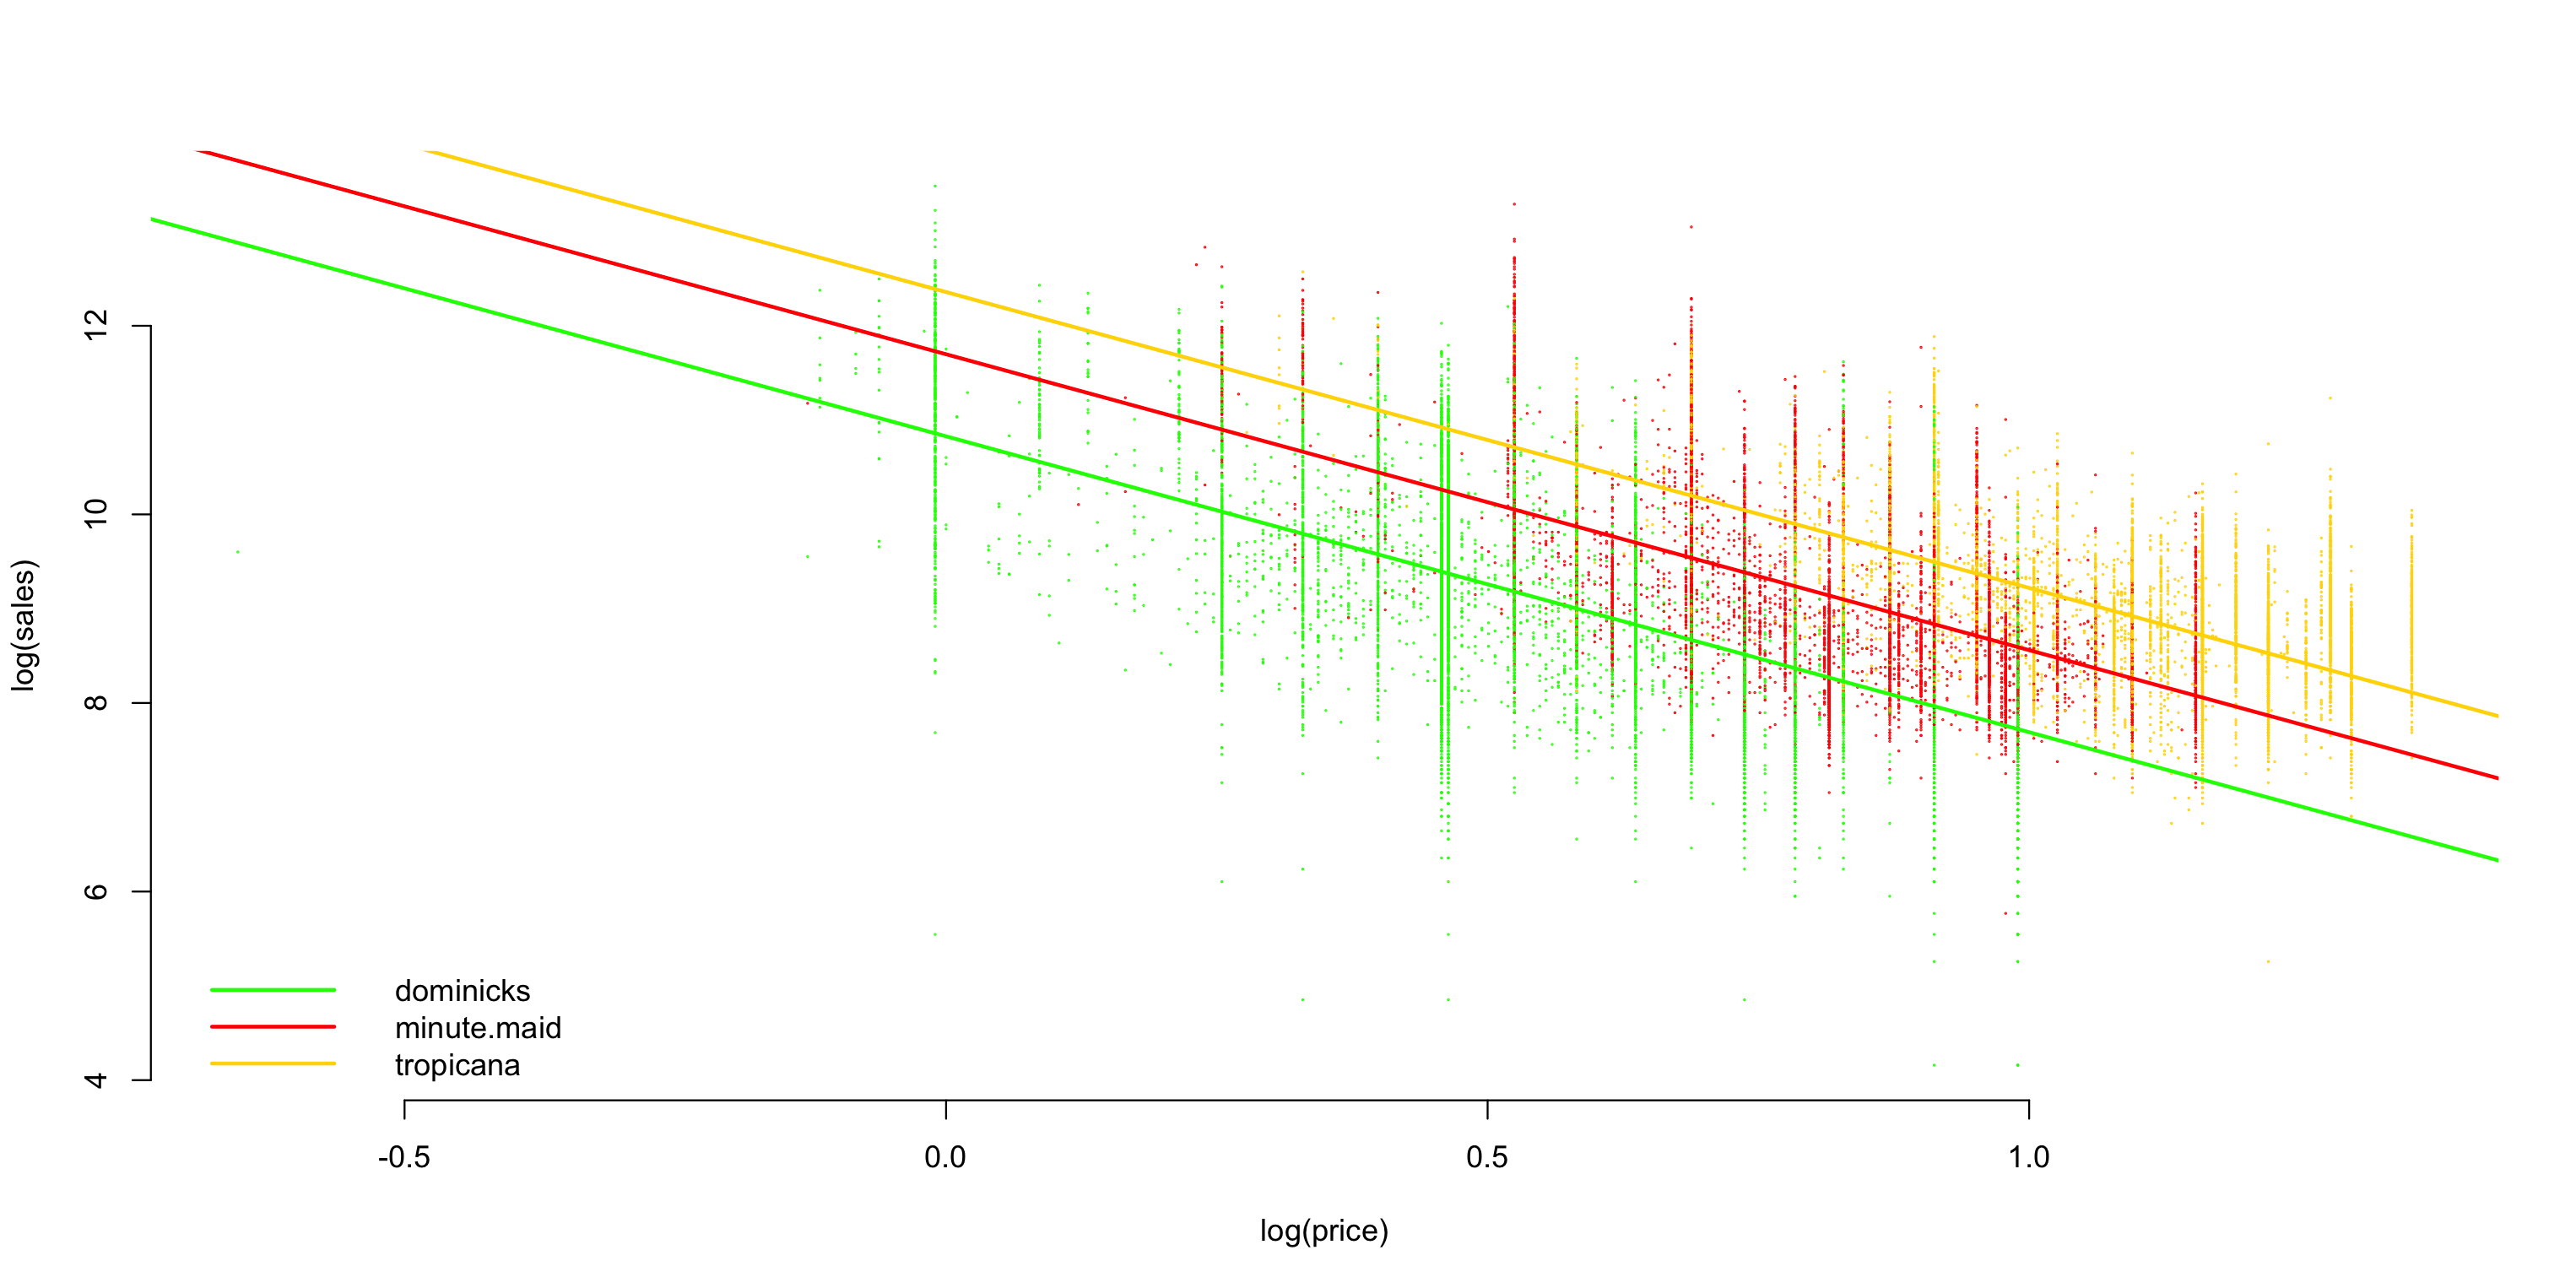

In [29]:
beta <- coef(reg)

plot(log(sales) ~ log(price), data=data, col=brandcol[data$brand], 
     cex=.1, pch=20, bty="n")
abline(a=beta[1], b=beta[2], col=brandcol[1], lwd=2)
abline(a=beta[1]+beta[3], b=beta[2], col=brandcol[2], lwd=2)
abline(a=beta[1]+beta[4], b=beta[2], col=brandcol[3], lwd=2)
legend("bottomleft", bty="n", lwd=2, col=brandcol, legend=levels(data$brand))

(Intercept)                  log(price) 
                10.95468173                 -3.37752963 
           brandminute.maid              brandtropicana 
                 0.88825363                  0.96238960 
log(price):brandminute.maid   log(price):brandtropicana 
                 0.05679476                  0.66576088

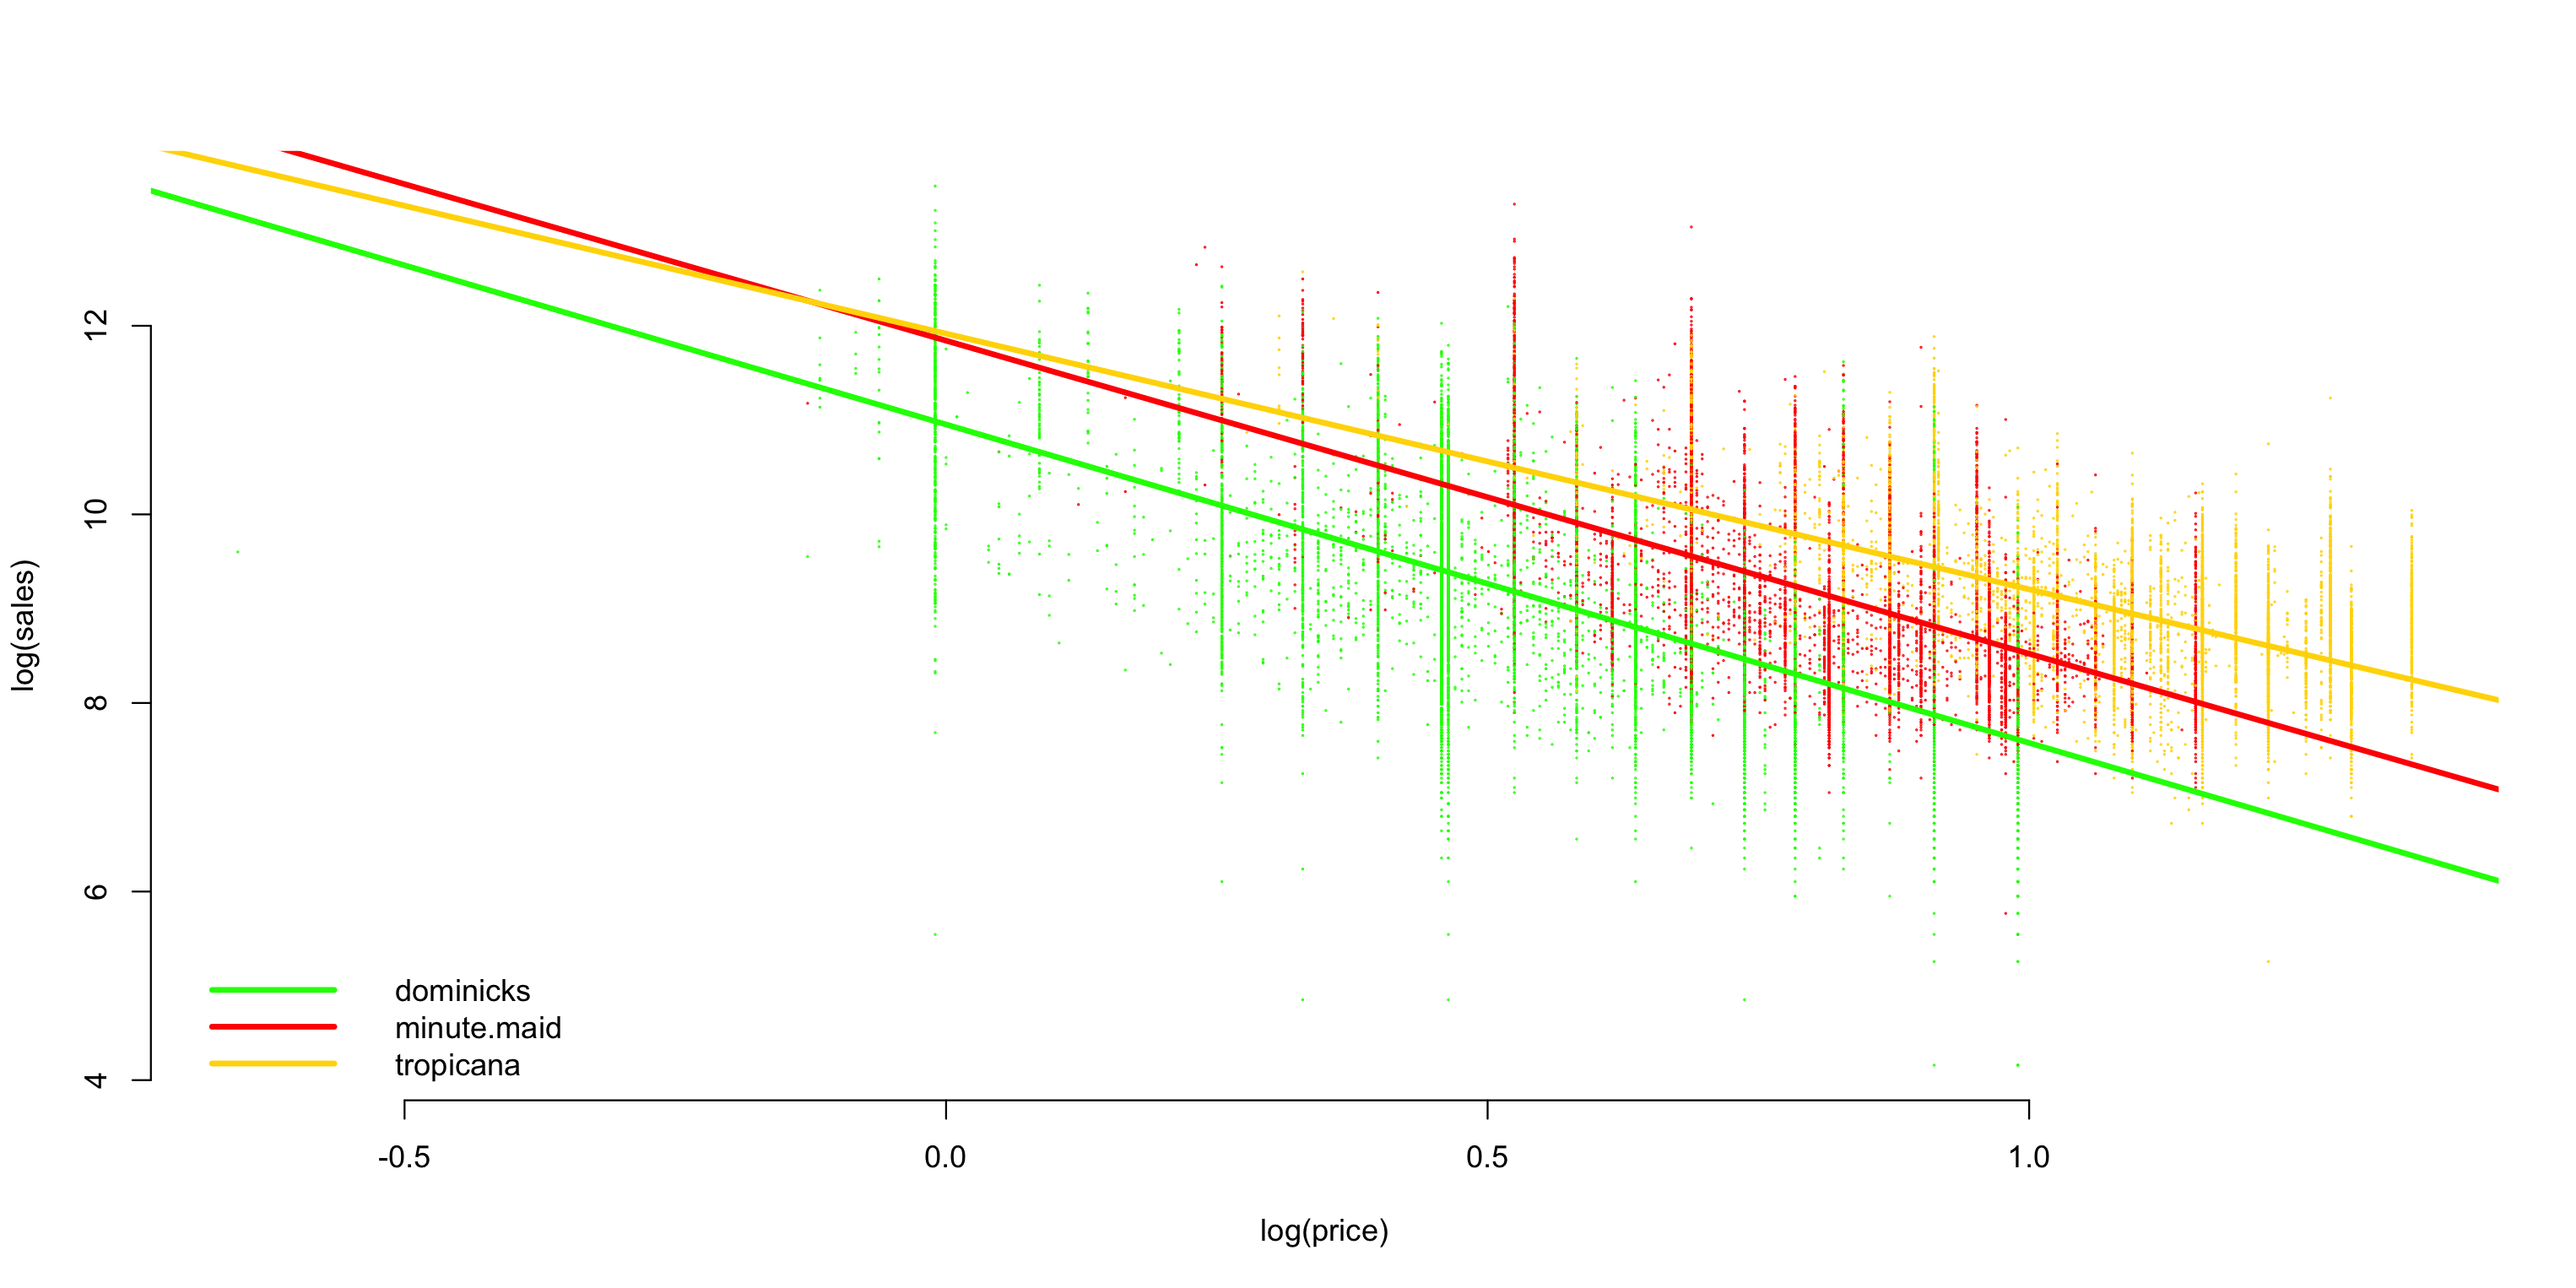

In [73]:
reg_interact = glm(log(sales) ~ log(price)*brand, data=data)
coef(reg_interact)

beta = coef(reg_interact)
plot(log(sales) ~ log(price), data=data, col=brandcol[data$brand],
    cex=.1, pch=20, bty="n")
abline(a=beta[1], b=beta[2], col=brandcol[1], lw=3)
abline(a=beta[1]+beta[3], b=beta[2]+beta[5], col=brandcol[2], lw=3)
abline(a=beta[1]+beta[4], b=beta[2]+beta[6], col=brandcol[3], lw=3)
legend("bottomleft", bty="n", lw=3, col=brandcol, legend=levels(data$brand))

In [77]:
beta[2]

log(price) 
  -3.37753

In [74]:
beta[2]+beta[5]

log(price) 
 -3.320735

In [75]:
beta[2]+beta[6]

log(price) 
 -2.711769